In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("C:\\Users\\HP Pavilion 13\\ML Lab\\Week3 Class Work\\AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Macbook", "AppStore", "interest rate", "recession", "discount", "innovation", "Barbie", "storm", "Trump"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X = df = df.resample("Q").mean()

In [10]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [11]:
X.head()

,Macbook,AppStore,interest rate,recession,discount,innovation,Barbie,storm,Trump
2004-03-31,0.0,0.000000,38.333333,7.666667,92.000000,90.000000,15.333333,47.000000,1.666667
2004-06-30,0.0,0.666667,41.666667,8.000000,87.666667,85.333333,14.333333,43.333333,1.666667
2004-09-30,0.0,0.333333,35.666667,6.666667,90.000000,77.333333,17.000000,60.000000,1.000000
2004-12-31,0.0,0.000000,33.333333,7.666667,85.666667,80.000000,20.333333,41.000000,1.333333
2005-03-31,0.0,0.000000,33.000000,6.333333,79.666667,80.666667,18.333333,37.000000,1.333333


# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled=scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso=Lasso(alpha=.005)

In [17]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.005)

In [18]:
coefficients = lasso.coef_

In [19]:
coefficients

array([ 0.1970638 ,  0.02990508,  0.35351616, -0.12625743,  0.00678422,
       -0.01841556, -0.06386243, -0.        , -0.00481873])

In [20]:
X.columns

Index(['Macbook', 'AppStore', 'interest rate', 'recession', 'discount',
       'innovation', 'Barbie', 'storm', 'Trump'],
      dtype='object')

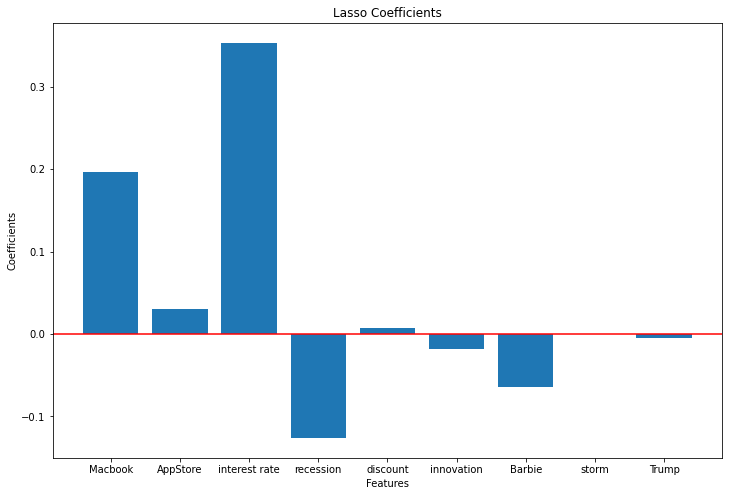

In [22]:
plt.figure(figsize = (12,8))
plt.bar(range(X_scaled.shape[1]), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

- It does not make sense that the "interest rate" has the highest positive coefficient because higher interest rate can potentially reduce consumer spending.
- "Appstore" and "macbook" have positive coefficient which make sense because it directly relates to higher earnings for Apple
- I expected "barbie" has coefficient equals to zero
- It make sense that "storm" and "Trump" have coefficient equals or near to zero